![NYC Skyline](nyc.jpg)

Welcome to the exploration of the New York City Airbnb market! In this project, we delve into datasets from various file formats, including CSV, Excel, and TSV, to uncover insights about Airbnb listings in the city. The data encompasses pricing details, room types, and host information, allowing us to paint a comprehensive picture of the Airbnb landscape in 2019.

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

Across this journey, the following questions will be answered:

- **What are the dates of the earliest and most recent reviews?**
- **How many of the listings are private rooms?**
- **What is the average listing price?** 
- **Combine the new variables into one DataFrame called review_dates with four columns in the following order: first_reviewed, last_reviewed, nb_private_rooms, and avg_price.** 

First and foremost, importing the necessary libaries and the subsequent creation of DataFrames is due. Below, they're created and then consolidated in a single DataFrame, where the column "listing_id" was identified as common between all, performing an outter join. Lastly, the column last_review was handled as a datetime object for easier visualization.

In [3]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read each file into separate DataFrames
price_df = pd.read_csv('data/airbnb_price.csv')
room_type_df = pd.read_excel('data/airbnb_room_type.xlsx')
last_review_df = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

# Merge the DataFrames on the common column 'listing_id'
merged_df = pd.merge(price_df, room_type_df, on='listing_id', how='outer')
merged_df = pd.merge(merged_df, last_review_df, on='listing_id', how='outer')
merged_df['last_review'] = pd.to_datetime(last_review_df['last_review'], format='%B %d %Y')


To understand the temporal dynamics of Airbnb reviews, we identified the earliest and most recent review dates. These valuable metrics, stored as **first_reviewed** and **last_reviewed** variables, provide a glimpse into the historical review activity within the dataset.

In [4]:
# Date of earliest and recent review
# Find the earliest and most recent dates
first_reviewed = merged_df['last_review'].min()
last_reviewed = merged_df['last_review'].max()

# Display the earliest and most recent dates
print("Earliest review date:", first_reviewed)
print("Most recent review date:", last_reviewed)


Earliest review date: 2019-01-01 00:00:00
Most recent review date: 2019-07-09 00:00:00


After examining the dates of the earliest and most recent reviews, we find that the dataset spans from January 1st, 2019, to July 9th, 2019. This temporal range provides context for understanding the distribution of reviews throughout the year. It suggests a concentrated period of review activity, which could be influenced by seasonal factors or external events.









A key aspect of Airbnb offerings is the variety of room types. By counting the number of private rooms, we gained insight into the popularity of this accommodation style among New York City Airbnb listings. This information is stored in the variable **nb_private_rooms**.

Number of listings with 'Private room': 11356

 The percentage of rooms are: 
 room_type
entire home/apt    0.526241
private room       0.450474
shared room        0.023285
Name: proportion, dtype: float64


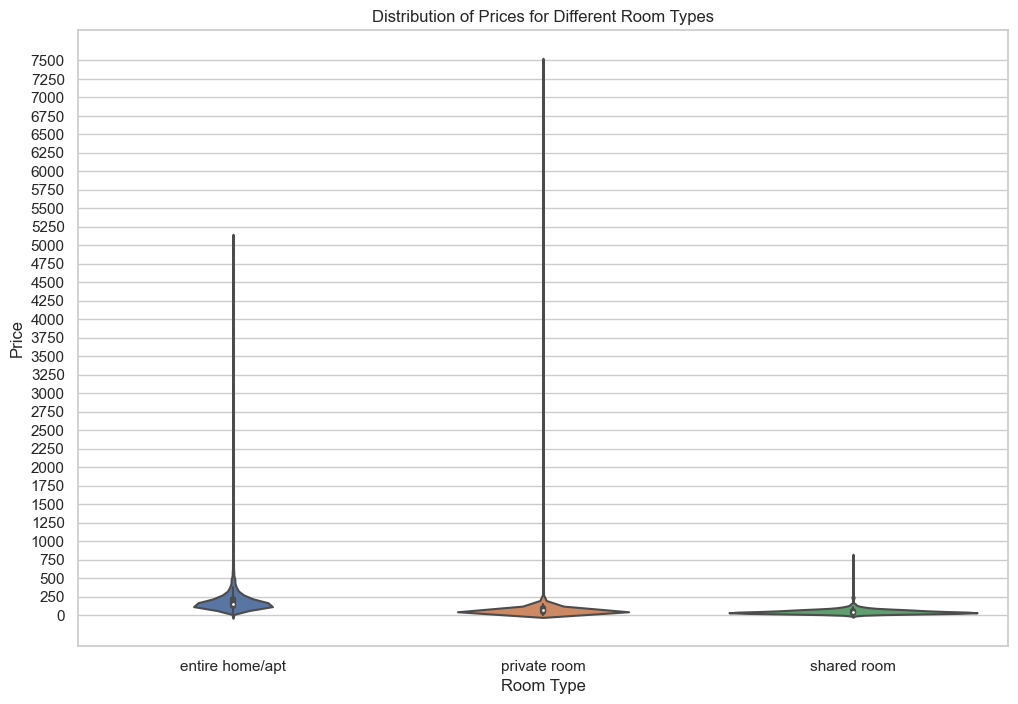

In [28]:
# How many of the listings are private rooms?

# Categories have mix of upper and lower cases
merged_df['room_type'] = merged_df['room_type'].str.lower()

# Count
nb_private_rooms = (merged_df['room_type'] == 'private room').sum()

print("Number of listings with 'Private room':", nb_private_rooms)

print("\n The percentage of rooms are: \n", merged_df['room_type'].value_counts(normalize=True))

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='room_type', y='price', data=merged_df)
# Set y-axis ticks at every 500 USD
plt.yticks(range(0, int(merged_df['price'].max()) + 250, 250))


# Set plot labels and title
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Distribution of Prices for Different Room Types')

# Show the plot
plt.show()

From the violin plot above, the distribution shows a slight advantage in the number of listings defined as entire home/apartments with a price up to 5100 USD. However, the amount of private rooms have a greater range of prices and a bigger distribution along what would be defined as an affordable price, ranging below 250 USD. This is in favor of privacy, considering that the shared room type has a greater distribution across this range though compromising in privacy.

Pricing is a crucial factor for both hosts and guests. Calculating the average listing price, rounded to the nearest penny, gives us a sense of the typical cost associated with Airbnb stays in New York City. The result is stored in the variable **avg_price**.

Average price (rounded to 2 decimal places): 141.78


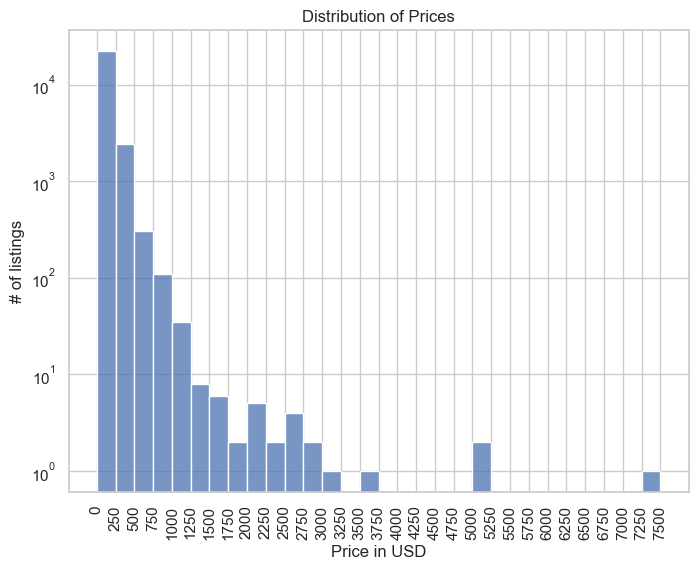

In [54]:
# Average listing price

# Since the word "dollars" exists
merged_df['price'] = merged_df['price'].astype(str).str.replace(' dollars', '').astype(int)

# Calculate the average price and round to the nearest integer
avg_price = merged_df['price'].mean()

print("Average price (rounded to 2 decimal places):", round(avg_price, 2))

# Distribution plot of prices
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['price'], bins=range(0, merged_df['price'].max() + 250, 250))
plt.title('Distribution of Prices')
plt.xlabel('Price in USD')
plt.ylabel('# of listings')
plt.yscale('log')
# Set x-axis ticks every 250 USD
tick_vals = np.arange(0, merged_df['price'].max() + 250, 250)
plt.xticks(tick_vals, rotation=90)
plt.show()

The distribution of the prices shows a great amount of listings ranging below 250 USD, consolidating NY as a great destination with prices worth paying a visit. This does however open a very serious question, is this taking a toll on the NY residents which may appreciate this accomodations available to them?

To consolidate our findings, we created a DataFrame named review_dates. This DataFrame includes the dates of the earliest and most recent reviews, the number of private rooms, and the average listing price. Organizing this information into a single row facilitates a holistic overview of the dataset.


In [55]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


This exploration into New York City's Airbnb market not only provided answers to specific questions but also revealed trends and patterns within the data. From temporal dynamics to accommodation preferences and pricing insights, our analysis contributes to a deeper understanding of the Airbnb ecosystem in this vibrant city. Each question addressed in this project contributes a unique perspective, collectively painting a rich portrait of the New York City Airbnb experience.